In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from pprint import pprint
import itertools
from scipy import stats
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
# import matplotlib
# matplotlib.use('Agg')

In [328]:
# 15-second sampling

In [329]:
# use the median of the peak timestamp to align the data. 

# *60* median of the time stamp where the peaks happens.

# Timestamp on interpolation.  15 seconds apart. 540 or 541 timepoints.


In [330]:
# Then we have the interpolated AIFs for this. Calculate the AUC at this step, the total values step=15s
# Normalize by that AUC. (compute the PBIF)

# PBIF = mean(AIF_subj/AUC_actual_subj) has AUC equal 1

# learn to predict the AUC using subjects' weight, age, dose, gender, ... (ML)

# Assume each subj has the same shape of curve. They just differ in AUC values.

# Subj_AIF = PBIF * Subject_Predicted_AUC (From ML algo)

In [4]:
# Align them with the AUC method. 
# Which raw data we will be using?
# Metabolite-Corrected-PBIFs-normWeightxDose-Table

In [77]:
# comp = pd.read_csv("/Users/darenma/Downloads/Compiled_AIF_PBIF_NormWeightxDose/Metabolite-correctec-AIF-Table 1.csv",
#                      header=0).iloc[1:]

In [608]:
# Need the PBIF*Actual_AUC.

In [52]:
yms = pd.read_excel("/Users/darenma/Downloads/Kinetic_model_PBIF_ML_observedAUC_predictedAUC/Kinetic_model_PBIF_ML_predictedAUC_MS/ATLAS_MS_Regional_Analysis_PBIF.xlsx")

In [53]:
ypd = pd.read_excel("/Users/darenma/Downloads/Kinetic_model_PBIF_ML_observedAUC_predictedAUC/Kinetic_model_PBIF_ML_predictedAUC_PD/ATLAS_PD_Regional_Analysis_AIF_vs_PBIF.xlsx")

In [54]:
yms

,Unnamed: 0,Unnamed: 1,DPA092617,DPA121918,DPA110117,DPA052219,DPA050819
0,Regions,Region #,Vt [ml/ccm],Vt [ml/ccm],Vt [ml/ccm],Vt [ml/ccm],Vt [ml/ccm]
1,ctx-lh-bankssts,3001_o,1.814821545923822,4.086718682659952,1.943274029362426,4.826755777144109,4.743871619772317
2,ctx-lh-caudalanteriorcingulate,3002_o,1.5389710987782006,3.783374096727684,1.7669539147562534,4.867106600105095,4.147410010080876
3,ctx-lh-caudalmiddlefrontal,3003_o,1.8062259557497107,3.9121086808144616,1.9118410210440668,5.105420799759548,4.693544221060317
4,ctx-lh-cuneus,3005_o,1.8037464860806205,3.7773365522567364,1.9121048383990331,4.818622410018125,5.38916686768349
...,...,...,...,...,...,...,...
82,Right-Pallidum,52_o,1.8822372819427664,4.0222918577393925,2.17195472325799,5.3036553917209535,6.7360487333934005
83,Right-Hippocampus,53_o,1.8189391169369498,4.134466004289613,2.116948430111672,5.202846450597207,5.4176719432558675
84,Right-Amygdala,54_o,1.6609334745774467,4.436653419107833,1.87986150621291,5.191896496144298,5.5812165206303606
85,Right-Accumbens-area,58_o,1.7856572980257912,3.7532179090779825,1.9297920043305576,5.520462455043025,5.340895385032188


## Step 1: Peak Alignment and Interpolation. 

In [55]:
comp = pd.read_csv("/Users/darenma/Downloads/Compiled_AIF_PBIF_NormWeightxDose/Metabolite-correctec-AIF-Table 1.csv",
                     header=0).iloc[1:]

In [56]:
comp

,Unnamed: 0,1001,Unnamed: 2,1002,Unnamed: 4,1003,Unnamed: 6,1004,Unnamed: 8,1005,...,Unnamed: 22,FR,Unnamed: 24,JD,Unnamed: 26,KT,Unnamed: 28,MM,Unnamed: 30,PP
1,0,0,0,0,0,0,45.0,22,0,3,...,0,42,0,0,45,1,0,0,0,5.57E-04
2,15,0,15,0,15,0,60.0,31,15,16,...,15,37,15,1,60,19,15,6,15,3.52E-04
3,30,31,30,0,30,0,75.0,33,30,27,...,30,32,30,21,75,33,30,36,30,1
4,45,59,45,34,45,0,90.0,29,45,35,...,45,29,45,48,90,46,45,31,45,23
5,60,48,60,49,60,9,105.0,26,60,39,...,60,26,60,37,105,40,60,26,60,34
6,75,36,75,37,75,28,120.0,23,75,36,...,75,23,75,31,120,35,75,22,75,25
7,120,21,90,30,90,41,135.0,21,90,32,...,90,21,90,26,135,31,90,19,90,22
8,135,19,105,26,105,32,150.0,19,105,30,...,105,19,105,23,150,28,105,17,105,19
9,150,17,120,23,120,29,165.0,17,120,27,...,120,17,120,20,165,25,120,16,120,17
10,165,16,135,20,135,27,195.0,14,135,25,...,135,16,135,18,180,22,135,15,135,16


In [57]:
subjs = []
for ci in range(0, 32, 2):
    cj = ci+1
    subjs.append(comp.columns[cj])
print(subjs)

['1001', '1002', '1003', '1004', '1005', '1009', '1013', '1015', '1020', '1022', '1023', 'FR', 'JD', 'KT', 'MM', 'PP']


In [122]:
np.argmax(df["1004"])

2

In [58]:
places_to_shift = []
for name in subjs:
    places_to_shift.append(np.argmax(df[name])-4)
print(places_to_shift)

[-1, 0, 2, -2, 0, 0, -1, -1, 4, -1, 0, -4, -1, -1, -2, 0]


In [59]:
# peak shift by code
df = comp.copy().astype(float)
df.loc[df.shape[0]+1]= None
for i, j in enumerate(places_to_shift):
    time_delta = 15 * j
    ts_name = f"Unnamed: {int(2*i)}"
    sj_name = subjs[i]
    print(ts_name)
    df.loc[:, ts_name] = df[ts_name] - time_delta
    
    minimum = df.loc[:, ts_name].min()
    maximum = df.loc[:, ts_name].max()
    print(minimum, maximum)
    if minimum > 0:
#         print(df.loc[df[ts_name]==minimum, sj_name])
#         if df.loc[df[ts_name]==minimum, sj_name].values > 0:
        df.loc[:, ts_name].iloc[-1] = 0
        df.loc[:, sj_name].iloc[-1] = 0
    
    df.loc[df[ts_name]==maximum, ts_name] = 5400.0
    df.loc[(df[ts_name]==5400)&df[sj_name].isna(), sj_name] = 0
    minimum = df.loc[:, ts_name].min()
    maximum = df.loc[:, ts_name].max()
    print(minimum, maximum)

Unnamed: 0
15.0 5415.0
0.0 5400.0
Unnamed: 2
0.0 5400.0
0.0 5400.0
Unnamed: 4
-30.0 5370.0
-30.0 5400.0
Unnamed: 6
75.0 5430.0
0.0 5400.0
Unnamed: 8
0.0 5400.0
0.0 5400.0
Unnamed: 10
0.0 5400.0
0.0 5400.0
Unnamed: 12
15.0 5415.0
0.0 5400.0
Unnamed: 14
15.0 5415.0
0.0 5400.0
Unnamed: 16
-60.0 5340.0
-60.0 5400.0
Unnamed: 18
15.0 5415.0
0.0 5400.0
Unnamed: 20
0.0 5400.0
0.0 5400.0
Unnamed: 22
60.0 5460.0
0.0 5400.0
Unnamed: 24
15.0 5415.0
0.0 5400.0
Unnamed: 26
60.0 5415.0
0.0 5400.0
Unnamed: 28
30.0 5430.0
0.0 5400.0
Unnamed: 30
0.0 5400.0
0.0 5400.0


In [60]:
df

,Unnamed: 0,1001,Unnamed: 2,1002,Unnamed: 4,1003,Unnamed: 6,1004,Unnamed: 8,1005,...,Unnamed: 22,FR,Unnamed: 24,JD,Unnamed: 26,KT,Unnamed: 28,MM,Unnamed: 30,PP
1,15.0,0.0,0.0,0.0,-30.0,0.000000e+00,75.0,22.0,0.0,3.0,...,60.0,42.0,15.0,0.0,60.0,1.0,30.0,0.0,0.0,0.000557
2,30.0,0.0,15.0,0.0,-15.0,0.000000e+00,90.0,31.0,15.0,16.0,...,75.0,37.0,30.0,1.0,75.0,19.0,45.0,6.0,15.0,0.000352
3,45.0,31.0,30.0,0.0,0.0,0.000000e+00,105.0,33.0,30.0,27.0,...,90.0,32.0,45.0,21.0,90.0,33.0,60.0,36.0,30.0,1.000000
4,60.0,59.0,45.0,34.0,15.0,0.000000e+00,120.0,29.0,45.0,35.0,...,105.0,29.0,60.0,48.0,105.0,46.0,75.0,31.0,45.0,23.000000
5,75.0,48.0,60.0,49.0,30.0,9.000000e+00,135.0,26.0,60.0,39.0,...,120.0,26.0,75.0,37.0,120.0,40.0,90.0,26.0,60.0,34.000000
6,90.0,36.0,75.0,37.0,45.0,2.800000e+01,150.0,23.0,75.0,36.0,...,135.0,23.0,90.0,31.0,135.0,35.0,105.0,22.0,75.0,25.000000
7,135.0,21.0,90.0,30.0,60.0,4.100000e+01,165.0,21.0,90.0,32.0,...,150.0,21.0,105.0,26.0,150.0,31.0,120.0,19.0,90.0,22.000000
8,150.0,19.0,105.0,26.0,75.0,3.200000e+01,180.0,19.0,105.0,30.0,...,165.0,19.0,120.0,23.0,165.0,28.0,135.0,17.0,105.0,19.000000
9,165.0,17.0,120.0,23.0,90.0,2.900000e+01,195.0,17.0,120.0,27.0,...,180.0,17.0,135.0,20.0,180.0,25.0,150.0,16.0,120.0,17.000000
10,180.0,16.0,135.0,20.0,105.0,2.700000e+01,225.0,14.0,135.0,25.0,...,195.0,16.0,150.0,18.0,195.0,22.0,165.0,15.0,135.0,16.000000


In [61]:
# 15 second interpolation
tts = pd.DataFrame({"tts":np.array(range(0, 5415, 15))})

In [62]:
tts

,tts
0,0
1,15
2,30
3,45
4,60
...,...
356,5340
357,5355
358,5370
359,5385


In [63]:
for i, name in enumerate(subjs):
    lfs = "Unnamed: "+str(2*i)
    print(lfs)
    print(name)
    df_mid = df[[lfs, name]].copy().dropna().astype(float)
    df_mid = df_mid.loc[df_mid[lfs]>=0, :]
    assert len(df_mid.columns) == 2
    tts = pd.merge(tts, df_mid, how="left", left_on="tts", right_on=lfs, validate="one_to_one")

Unnamed: 0
1001
Unnamed: 2
1002
Unnamed: 4
1003
Unnamed: 6
1004
Unnamed: 8
1005
Unnamed: 10
1009
Unnamed: 12
1013
Unnamed: 14
1015
Unnamed: 16
1020
Unnamed: 18
1022
Unnamed: 20
1023
Unnamed: 22
FR
Unnamed: 24
JD
Unnamed: 26
KT
Unnamed: 28
MM
Unnamed: 30
PP


In [64]:
tts["Unnamed: 0"].max()

5400.0

In [125]:
tts["1004"].head(20)

0      0.0
1      NaN
2      NaN
3      NaN
4      NaN
5     22.0
6     31.0
7     33.0
8     29.0
9     26.0
10    23.0
11    21.0
12    19.0
13    17.0
14     NaN
15    14.0
16    13.0
17    12.0
18    11.0
19     NaN
Name: 1004, dtype: float64

In [66]:
test_q = tts[["tts"]+subjs].interpolate(method="quadratic")
test_akima = tts[["tts"]+subjs].interpolate(method="akima")
test_linear = tts[["tts"]+subjs].interpolate(method="slinear")
test_spline = tts[["tts"]+subjs].interpolate(method="spline", order=5)

In [68]:
# raw = raw.astype(float)

In [380]:
# plt.rcParams["figure.figsize"] = (10,8)
# plt.plot(raw["Unnamed: 16"].dropna(), raw["1020"].dropna())
# plt.show()

In [379]:
# plt.plot(test_q["tts"].dropna(), test_q["1020"].dropna())
# plt.show()

Interpolation technique to use. One of:

‘linear’: Ignore the index and treat the values as equally spaced. This is the only method supported on MultiIndexes.

‘time’: Works on daily and higher resolution data to interpolate given length of interval.

‘index’, ‘values’: use the actual numerical values of the index.

‘pad’: Fill in NaNs using existing values.

‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’: Passed to scipy.interpolate.interp1d. These methods use the numerical values of the index. Both ‘polynomial’ and ‘spline’ require that you also specify an order (int), e.g. df.interpolate(method='polynomial', order=5).

‘krogh’, ‘piecewise_polynomial’, ‘spline’, ‘pchip’, ‘akima’, ‘cubicspline’: Wrappers around the SciPy interpolation methods of similar names. See Notes.

‘from_derivatives’: Refers to scipy.interpolate.BPoly.from_derivatives which replaces ‘piecewise_polynomial’ interpolation method in scipy 0.18.

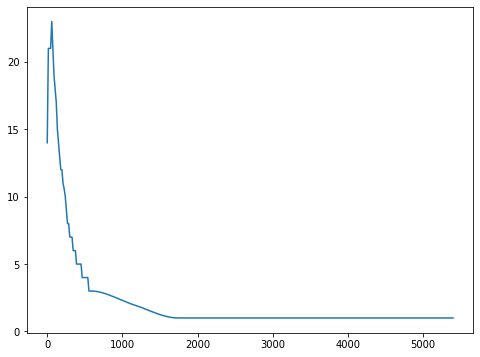

In [69]:
tests_ = tts[["tts"]+subjs].interpolate(method="akima", order=1)
plt.plot(tests_["tts"].dropna(), tests_["1020"].dropna())
plt.show()

In [21]:
tts

,tts,Unnamed: 0,1001,Unnamed: 2,1002,Unnamed: 4,1003,Unnamed: 6,1004,Unnamed: 8,...,Unnamed: 22,FR,Unnamed: 24,JD,Unnamed: 26,KT,Unnamed: 28,MM,Unnamed: 30,PP
0,0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,NaN,0.0,...,0.0,42.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.000557
1,15,15.0,0.0,15.0,0.0,15.0,0.000000e+00,NaN,NaN,15.0,...,15.0,37.0,15.0,1.0,NaN,NaN,15.0,6.0,15.0,0.000352
2,30,30.0,31.0,30.0,0.0,30.0,0.000000e+00,NaN,NaN,30.0,...,30.0,32.0,30.0,21.0,NaN,NaN,30.0,36.0,30.0,1.000000
3,45,45.0,59.0,45.0,34.0,45.0,0.000000e+00,45.0,22.0,45.0,...,45.0,29.0,45.0,48.0,45.0,1.0,45.0,31.0,45.0,23.000000
4,60,60.0,48.0,60.0,49.0,60.0,9.000000e+00,60.0,31.0,60.0,...,60.0,26.0,60.0,37.0,60.0,19.0,60.0,26.0,60.0,34.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,5355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,5370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,5385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


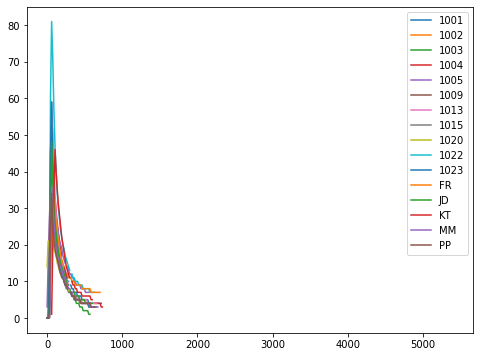

In [70]:
plt.rcParams["figure.figsize"] = (8, 6)
# short_tts = tts.iloc[:100]
for name in subjs:
    
    plt.plot(tts["tts"], tts[name], )
#     plt.xlim=[0, 1000]
plt.legend(subjs)
plt.savefig("RawTAC_Lines.png")

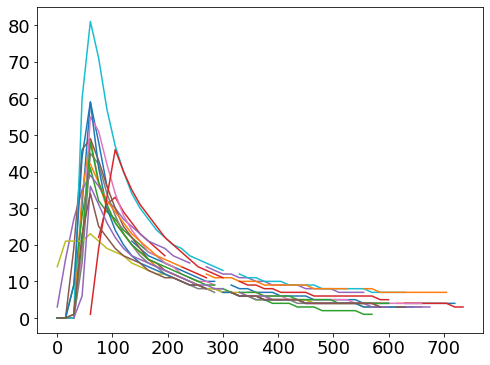

In [195]:
plt.rcParams["figure.figsize"] = (8, 6)
short_tts = tts.iloc[:50]
for name in subjs:
    plt.plot(short_tts["tts"], short_tts[name], )
    plt.xlim=[0, 800]
# plt.legend(subjs)
# plt.title("Raw TAC Curves", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig("RawTAC_Lines.png", dpi=600)

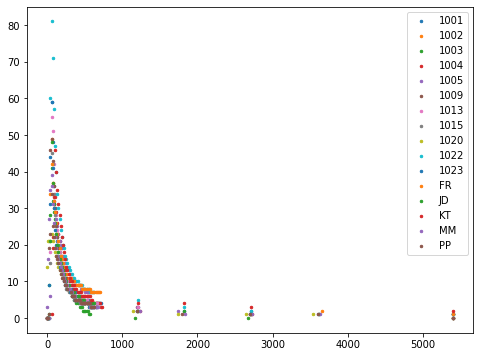

In [72]:
plt.rcParams["figure.figsize"] = (8, 6)
for name in subjs:
    
    plt.scatter(tts["tts"], tts[name], s=6)
plt.legend(subjs)
# plt.show()
plt.savefig("RawTAC_Dots.png")

In [451]:
# ta = tts.fillna(0)
# plt.rcParams["figure.figsize"] = (20,12)
# for name in subjs:
#     print(name)
#     plt.plot(ta["tts"], ta[name])
# #     plt.show()
# plt.legend(subjs)
# plt.show()
# # plt.savefig("Interpolate_0912.png")

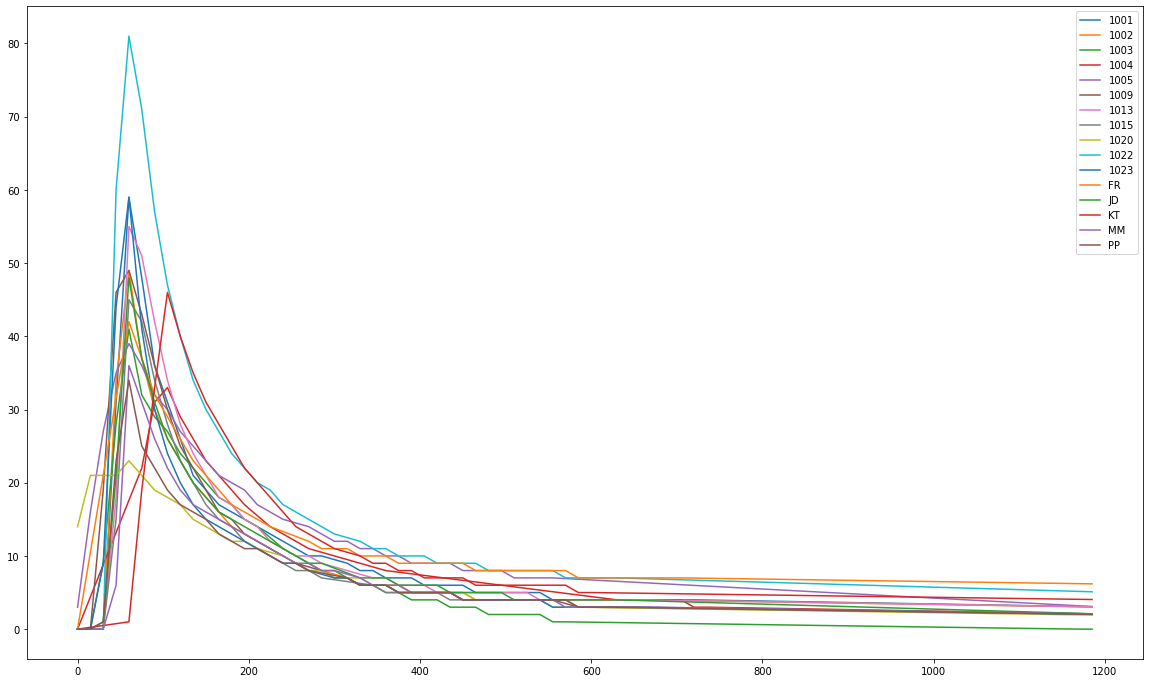

In [116]:
plt.rcParams["figure.figsize"] = (20,12)
for name in subjs:
    
    plt.plot(test_linear.iloc[:80]["tts"], test_linear.iloc[:80][name])
plt.legend(subjs)
# plt.savefig("Interpolate_0915.png")
plt.show()

In [453]:
test_linear.to_csv("Interpolate_0915_Linear.csv")

In [454]:
tts.to_csv("PeakAligned_with_15sec_raw.csv")

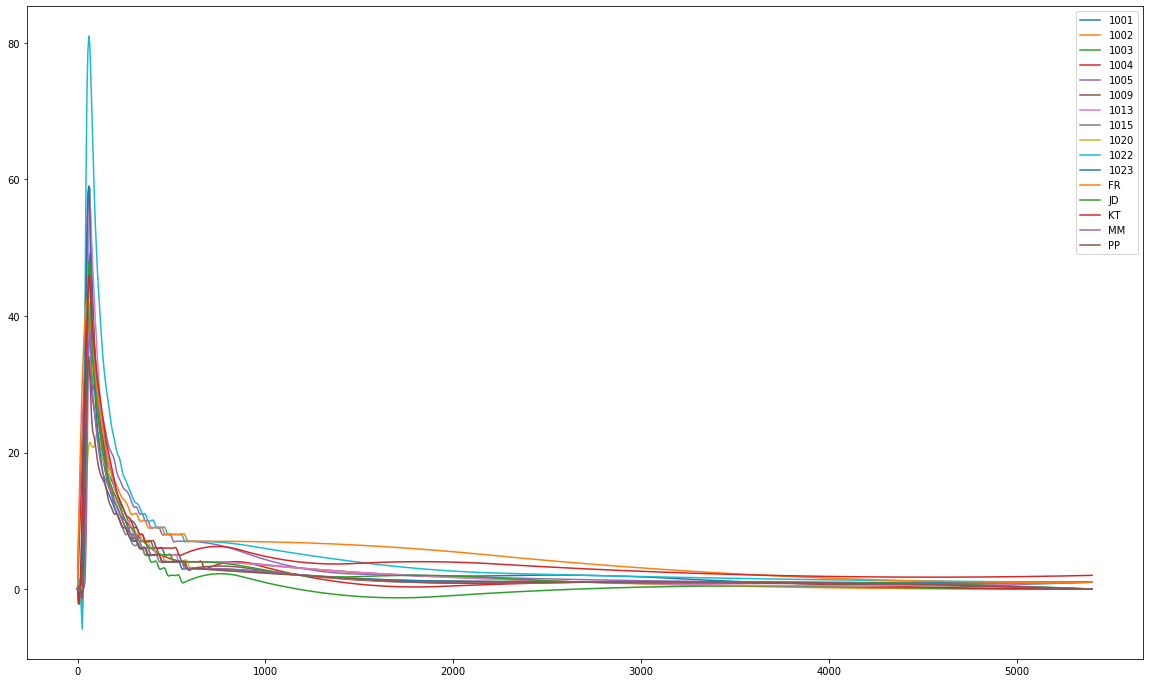

In [116]:
tnew = tests = tts[["tts"]+subjs].interpolate(method="quadratic")

plt.rcParams["figure.figsize"] = (20,12)
for name in subjs:
    
    plt.plot(tnew["tts"], tnew[name])
plt.legend(subjs)

In [455]:
test_linear

,tts,1001,1002,1003,1004,1005,1009,1013,1015,1020,1022,1023,FR,JD,KT,MM,PP
0,0,0.0,0.000000,0.000000e+00,0.000000,3.0,0.000000,0.0,0.0,14.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000557
1,15,0.0,0.000000,0.000000e+00,4.400000,16.0,0.000000,0.0,0.0,21.0,0.000000,0.0,10.500000,0.000000,0.250000,0.000000,0.000352
2,30,0.0,0.000000,9.000000e+00,8.800000,27.0,19.000000,0.0,0.0,21.0,0.000000,9.0,21.000000,1.000000,0.500000,0.000000,1.000000
3,45,31.0,34.000000,2.800000e+01,13.200000,35.0,46.000000,18.0,15.0,21.0,60.000000,44.0,31.500000,21.000000,0.750000,6.000000,23.000000
4,60,59.0,49.000000,4.100000e+01,17.600000,39.0,49.000000,55.0,45.0,23.0,81.000000,59.0,42.000000,48.000000,1.000000,36.000000,34.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5340,1.0,0.022222,4.021990e-08,0.022472,1.0,0.022222,1.0,1.0,1.0,1.022346,1.0,1.034483,0.033613,2.022346,0.033898,0.033333
357,5355,1.0,0.016667,3.016495e-08,0.016854,1.0,0.016667,1.0,1.0,1.0,1.016760,1.0,1.025862,0.025210,2.016760,0.025424,0.025000
358,5370,1.0,0.011111,2.011001e-08,0.011236,1.0,0.011111,1.0,1.0,1.0,1.011173,1.0,1.017241,0.016807,2.011173,0.016949,0.016667
359,5385,1.0,0.005556,1.005507e-08,0.005618,1.0,0.005556,1.0,1.0,1.0,1.005587,1.0,1.008621,0.008403,2.005587,0.008475,0.008333


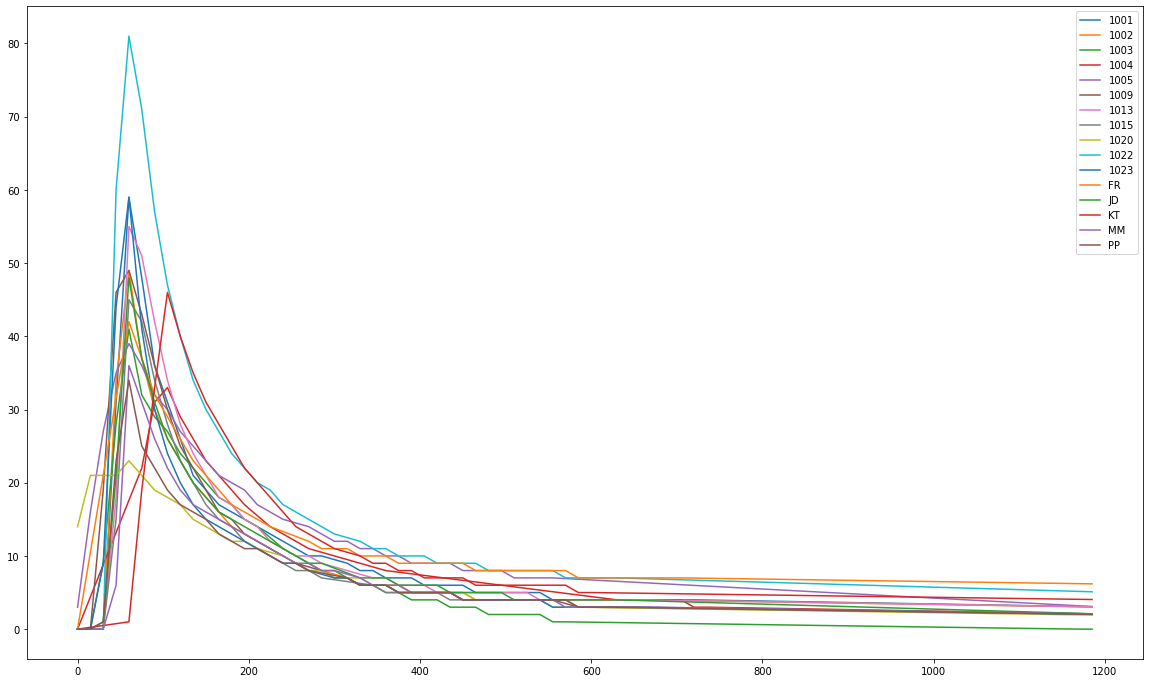

In [117]:
tnew = tests = tts[["tts"]+subjs].interpolate(method="linear")

plt.rcParams["figure.figsize"] = (20,12)
for name in subjs:
    
    plt.plot(tnew.iloc[:80]["tts"], tnew.iloc[:80][name])
plt.legend(subjs)

In [121]:
tnew["1004"].head(10)

0     0.0
1     4.4
2     8.8
3    13.2
4    17.6
5    22.0
6    31.0
7    33.0
8    29.0
9    26.0
Name: 1004, dtype: float64

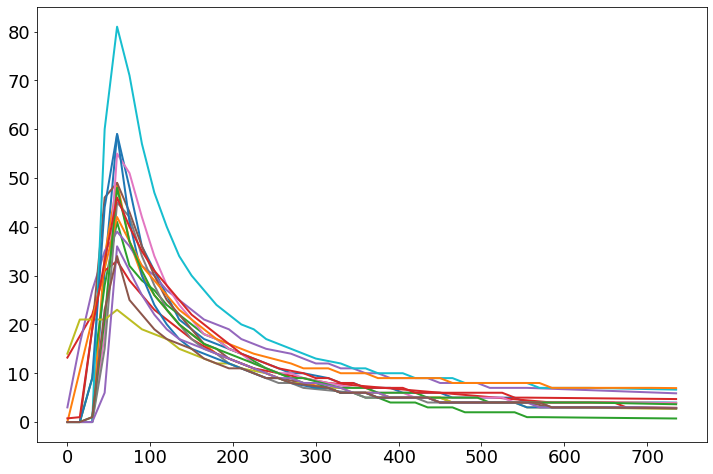

In [186]:
# tnew = tests = tts[["tts"]+subjs].interpolate(method="slinear")

plt.rcParams["figure.figsize"] = (12,8)
for name in subjs:
    
    plt.plot(tnew.iloc[:50]["tts"], tnew.iloc[:50][name], linewidth=2)
# plt.legend(subjs, fontsize=16)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.savefig("Interpolated_PeakAligned_1207.png", dpi=600)
# plt.show()

In [132]:
tnew["1001"].head(10)

0     0.0
1     0.0
2     0.0
3    31.0
4    59.0
5    48.0
6    36.0
7    31.0
8    26.0
9    21.0
Name: 1001, dtype: float64

In [138]:
tnew.loc[:, "1004"] = tnew["1004"].shift(-1)

In [145]:
tnew = tnew.fillna(0)

In [144]:
tnew.loc[:, "KT"] = tnew["KT"].shift(-3)

In [147]:
tnew.to_csv("Interpolate_1207_slinear.csv")

In [118]:
tnew.to_csv("Interpolate_0912_slinear.csv")

In [148]:
tnew = pd.read_csv("Interpolate_1207_slinear.csv")

In [149]:
tnew

,Unnamed: 0,tts,1001,1002,1003,1004,1005,1009,1013,1015,1020,1022,1023,FR,JD,KT,MM,PP
0,0,0,0.0,0.000000,0.000000e+00,13.200000,3.0,0.000000,0.0,0.0,14.0,0.000000,0.0,0.000000,0.000000,0.750000,0.000000,0.000557
1,1,15,0.0,0.000000,0.000000e+00,17.600000,16.0,0.000000,0.0,0.0,21.0,0.000000,0.0,10.500000,0.000000,1.000000,0.000000,0.000352
2,2,30,0.0,0.000000,9.000000e+00,22.000000,27.0,19.000000,0.0,0.0,21.0,0.000000,9.0,21.000000,1.000000,19.000000,0.000000,1.000000
3,3,45,31.0,34.000000,2.800000e+01,31.000000,35.0,46.000000,18.0,15.0,21.0,60.000000,44.0,31.500000,21.000000,33.000000,6.000000,23.000000
4,4,60,59.0,49.000000,4.100000e+01,33.000000,39.0,49.000000,55.0,45.0,23.0,81.000000,59.0,42.000000,48.000000,46.000000,36.000000,34.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,356,5340,1.0,0.022222,4.021990e-08,0.005618,1.0,0.022222,1.0,1.0,1.0,1.022346,1.0,1.034483,0.033613,2.005587,0.033898,0.033333
357,357,5355,1.0,0.016667,3.016495e-08,0.000000,1.0,0.016667,1.0,1.0,1.0,1.016760,1.0,1.025862,0.025210,2.000000,0.025424,0.025000
358,358,5370,1.0,0.011111,2.011001e-08,0.000000,1.0,0.011111,1.0,1.0,1.0,1.011173,1.0,1.017241,0.016807,0.000000,0.016949,0.016667
359,359,5385,1.0,0.005556,1.005507e-08,0.000000,1.0,0.005556,1.0,1.0,1.0,1.005587,1.0,1.008621,0.008403,0.000000,0.008475,0.008333


## Step 2: PBIF

In [154]:
# scaled['pbif'].sum()

In [155]:
aif = pd.read_csv("Interpolate_1207_slinear.csv", index_col=0)

In [156]:
auc = aif.sum()

In [159]:
scaled.iloc[:60]

,tts,1001,1002,1003,1004,1005,1009,1013,1015,1020,1022,1023,FR,JD,KT,MM,PP,pbif
0,0.0,0.000000,0.000000,0.000000,0.016004,0.002474,0.000000,0.000000,0.000000,0.017722,0.000000,0.000000,0.000000,0.000000,0.000492,0.000000,7.940118e-07,0.002293
1,15.0,0.000000,0.000000,0.000000,0.021339,0.013196,0.000000,0.000000,0.000000,0.026582,0.000000,0.000000,0.006200,0.000000,0.000655,0.000000,5.017812e-07,0.004248
2,30.0,0.000000,0.000000,0.020642,0.026673,0.022268,0.022933,0.000000,0.000000,0.026582,0.000000,0.010227,0.012400,0.001162,0.012453,0.000000,1.425515e-03,0.009798
3,45.0,0.028453,0.039013,0.064220,0.037585,0.028866,0.055522,0.017510,0.017710,0.026582,0.037221,0.050000,0.018601,0.024404,0.021629,0.008328,3.278684e-02,0.031777
4,60.0,0.054153,0.056225,0.094037,0.040010,0.032165,0.059143,0.053502,0.053129,0.029114,0.050248,0.067045,0.024801,0.055782,0.030149,0.049965,4.846751e-02,0.049871
5,75.0,0.044057,0.042456,0.073394,0.035160,0.029691,0.051901,0.049611,0.049587,0.026582,0.044045,0.046591,0.021848,0.042998,0.026217,0.043026,3.563787e-02,0.041425
6,90.0,0.033043,0.034423,0.066514,0.031523,0.026392,0.043452,0.040856,0.040142,0.024051,0.035360,0.034091,0.018896,0.036026,0.022940,0.036086,3.136133e-02,0.034697
7,105.0,0.028453,0.029834,0.061927,0.027886,0.024742,0.036210,0.033074,0.033058,0.022785,0.029156,0.027273,0.017124,0.030215,0.020318,0.030534,2.708478e-02,0.029980
8,120.0,0.023864,0.026391,0.055046,0.025461,0.022268,0.030175,0.027237,0.027155,0.021519,0.024814,0.022727,0.015353,0.026729,0.018352,0.026371,2.423375e-02,0.026106
9,135.0,0.019275,0.022949,0.050459,0.023036,0.020619,0.026554,0.023346,0.023613,0.018987,0.021092,0.019318,0.013581,0.023242,0.016385,0.023595,2.280824e-02,0.023054


In [171]:
scaled

,tts,1001,1002,1003,1004,1005,1009,1013,1015,1020,1022,1023,FR,JD,KT,MM,PP,pbif
0,0.0,0.000000,0.000000,0.000000e+00,0.016004,0.002474,0.000000,0.000000,0.000000,0.017722,0.000000,0.000000,0.000000,0.000000,0.000492,0.000000,7.940118e-07,0.002293
1,15.0,0.000000,0.000000,0.000000e+00,0.021339,0.013196,0.000000,0.000000,0.000000,0.026582,0.000000,0.000000,0.006200,0.000000,0.000655,0.000000,5.017812e-07,0.004248
2,30.0,0.000000,0.000000,2.064219e-02,0.026673,0.022268,0.022933,0.000000,0.000000,0.026582,0.000000,0.010227,0.012400,0.001162,0.012453,0.000000,1.425515e-03,0.009798
3,45.0,0.028453,0.039013,6.422015e-02,0.037585,0.028866,0.055522,0.017510,0.017710,0.026582,0.037221,0.050000,0.018601,0.024404,0.021629,0.008328,3.278684e-02,0.031777
4,60.0,0.054153,0.056225,9.403664e-02,0.040010,0.032165,0.059143,0.053502,0.053129,0.029114,0.050248,0.067045,0.024801,0.055782,0.030149,0.049965,4.846751e-02,0.049871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5340.0,0.000918,0.000025,9.224742e-11,0.000007,0.000825,0.000027,0.000973,0.001181,0.001266,0.000634,0.001136,0.000611,0.000039,0.001314,0.000047,4.751716e-05,0.000566
357,5355.0,0.000918,0.000019,6.918563e-11,0.000000,0.000825,0.000020,0.000973,0.001181,0.001266,0.000631,0.001136,0.000606,0.000029,0.001311,0.000035,3.563787e-05,0.000562
358,5370.0,0.000918,0.000013,4.612385e-11,0.000000,0.000825,0.000013,0.000973,0.001181,0.001266,0.000627,0.001136,0.000601,0.000020,0.000000,0.000024,2.375858e-05,0.000476
359,5385.0,0.000918,0.000006,2.306206e-11,0.000000,0.000825,0.000007,0.000973,0.001181,0.001266,0.000624,0.001136,0.000596,0.000010,0.000000,0.000012,1.187929e-05,0.000473


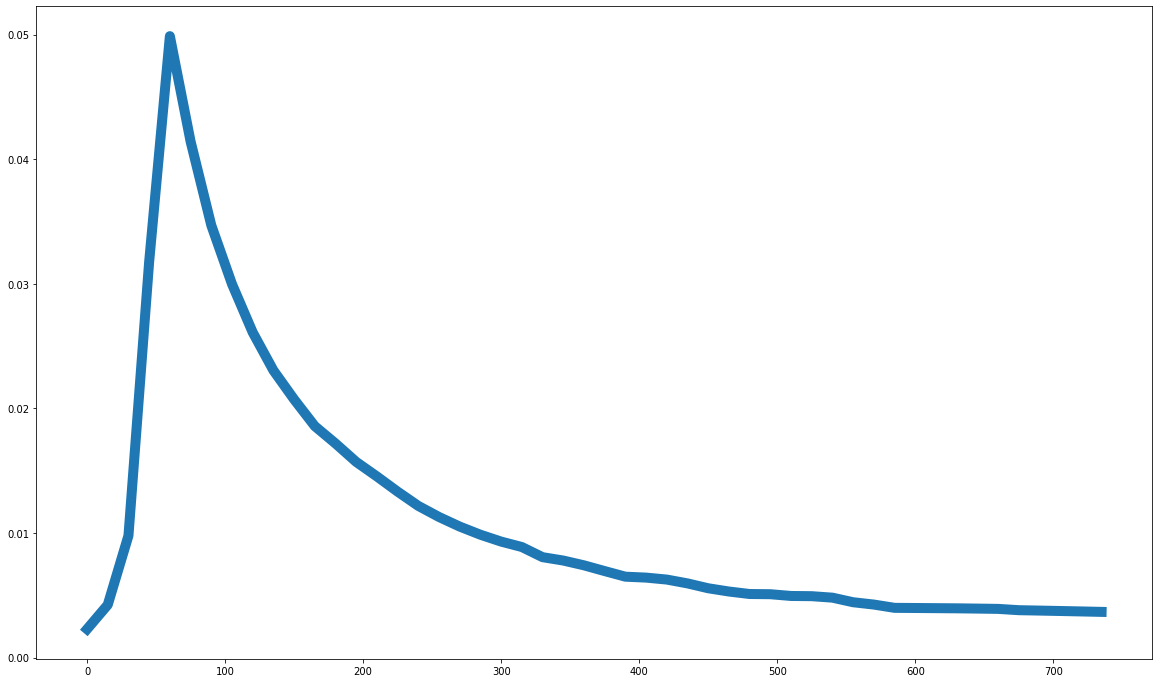

In [175]:
auc.loc["tts"] = 1
scaled = aif/auc
pbif = scaled.drop(columns=['tts']).mean(axis=1)
scaled.loc[:, "pbif"] = pbif
plt.plot(scaled.iloc[:50]['tts'], scaled.iloc[:50]['pbif'], linewidth=10, markersize=12)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.savefig("PBIF.png", dpi=600)

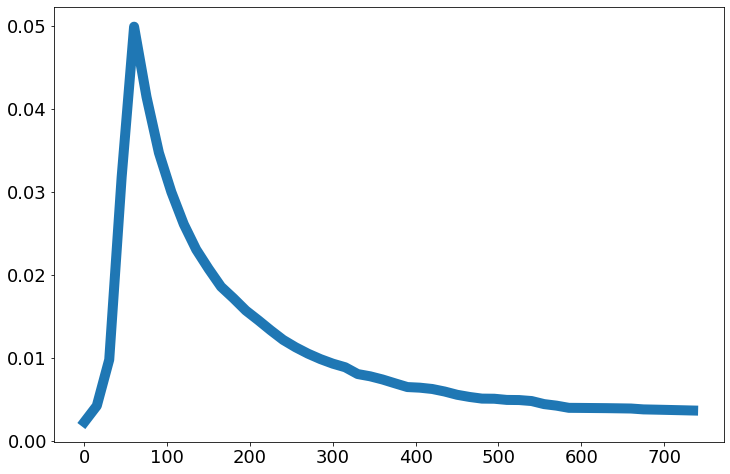

In [187]:
plt.plot(scaled.iloc[:50]['tts'], scaled.iloc[:50]['pbif'], linewidth=10, markersize=12)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.savefig("PBIF.png", dpi=600)

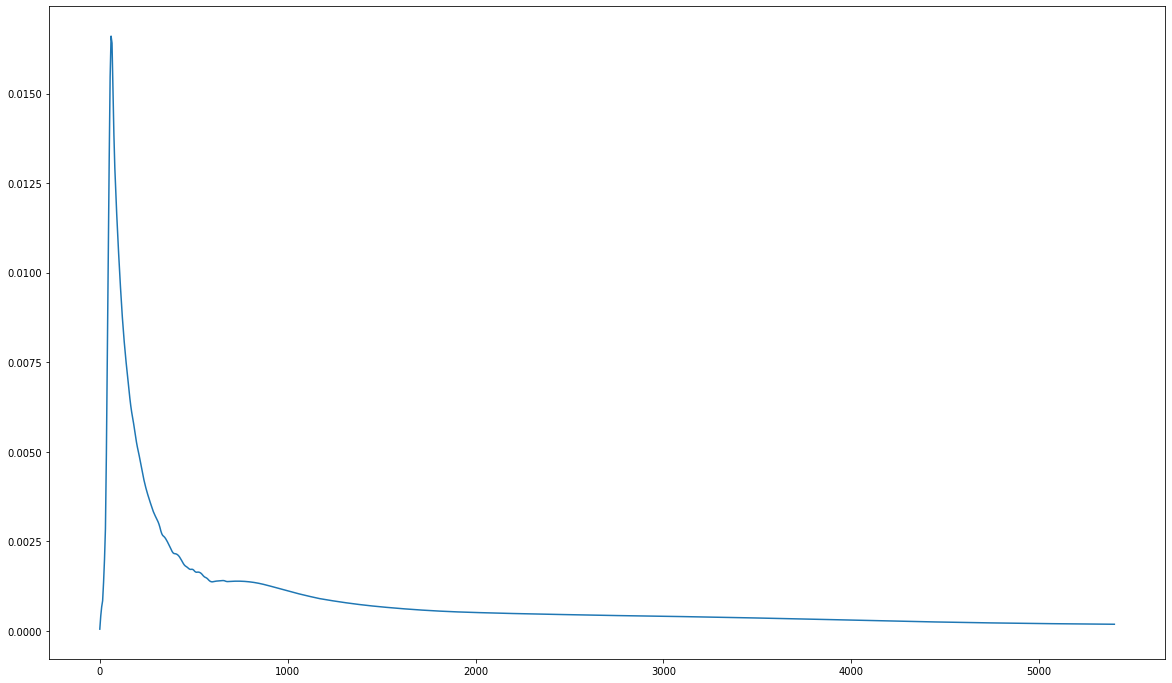

In [151]:
# # the quardratic interpolation doesn't work well
# aif = pd.read_csv("Interpolate_0912.csv", index_col=0)
# aif = aif.clip(lower=0)
# auc = aif.sum()
# auc.loc["tts"] = 1
# scaled = aif/auc
# pbif = scaled.drop(columns=['tts']).mean(axis=1)
# scaled.loc[:, "pbif"] = pbif
# plt.plot(scaled['tts'], scaled['pbif'])
# plt.show()

## Step 3: Predict the subjects' AUCs

In [84]:
peaks = aif.max()[1:].values

In [85]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [86]:
aif_simple = pd.read_csv("AIF_Simple_Data.csv", index_col=0)

new_df = aif_simple.drop(columns=["ID"]).astype(np.float).copy()
new_df.loc[:,"sqrt_dose"] = np.sqrt(new_df[["NET dose (mCi)"]])
new_df.loc[:,"lambda"] = new_df['sqrt_dose'].div(new_df['Weight (Kgs)'])
new_df["dose_by_age"] = new_df['NET dose (mCi)']/new_df['Age']
new_df["weight_by_age"] = new_df['Weight (Kgs)']/new_df["Age"]
new_df.Sex = 2*(new_df.Sex-0.5)
new_df.Genotype = (new_df.Genotype-1.5)*2
new_df["asg"] = new_df.Age * new_df.Sex * new_df.Genotype

new_df["dose_2"] = new_df['NET dose (mCi)']**2
new_df["weight_2"] = new_df['Weight (Kgs)']**2
new_df["sqrt_weight"] = new_df['Weight (Kgs)']**0.5
new_df["lambda_0.5"] = new_df['lambda'] ** 0.5
new_df["weight_-1"] = new_df['Weight (Kgs)']**(-1)

In [87]:
# new_df has the same order with {subjs}

In [88]:
new_df.loc[:,"ID"] = subjs

In [89]:
new_df.loc[:, "peaks"] = peaks

In [90]:
new_df.loc[:, "auc"] = auc[1:].values

In [91]:
new_df

,Age,Sex,NET dose (mCi),Weight (Kgs),Genotype,auc,sqrt_dose,lambda,dose_by_age,weight_by_age,asg,dose_2,weight_2,sqrt_weight,lambda_0.5,weight_-1,ID,peaks
0,6.8,1.0,16.09,8.164663,1.0,1089.500000,4.011234,0.491292,2.366176,1.200686,6.8,258.8881,66.661716,2.857387,0.700922,0.122479,1001,59.0
1,5.9,1.0,14.36,8.164663,1.0,871.500000,3.789459,0.464129,2.433898,1.383841,5.9,206.2096,66.661716,2.857387,0.681270,0.122479,1002,49.0
2,6.3,1.0,12.86,8.164663,-1.0,436.000258,3.586084,0.439220,2.041270,1.295978,-6.3,165.3796,66.661716,2.857387,0.662737,0.122479,1003,41.0
3,7.1,1.0,13.37,6.577089,1.0,838.000000,3.656501,0.555945,1.883099,0.926351,7.1,178.7569,43.258105,2.564584,0.745617,0.152043,1004,33.0
4,6.2,1.0,13.50,5.624545,1.0,1212.500000,3.674235,0.653250,2.177419,0.907185,6.2,182.2500,31.635511,2.371612,0.808239,0.177792,1005,39.0
5,5.5,-1.0,11.15,5.533827,-1.0,828.500000,3.339162,0.603409,2.027273,1.006150,5.5,124.3225,30.623240,2.352409,0.776794,0.180707,1009,49.0
6,6.8,1.0,15.49,7.711070,-1.0,1028.000000,3.935734,0.510400,2.277941,1.133981,-6.8,239.9401,59.460605,2.776881,0.714423,0.129684,1013,55.0
7,6.8,1.0,12.65,8.164663,1.0,847.000000,3.556684,0.435619,1.860294,1.200686,6.8,160.0225,66.661716,2.857387,0.660015,0.122479,1015,45.0
8,6.5,-1.0,16.69,6.894604,1.0,790.000000,4.085340,0.592542,2.567692,1.060708,-6.5,278.5561,47.535565,2.625758,0.769767,0.145041,1020,23.0
9,6.1,-1.0,14.69,5.624545,1.0,1612.000000,3.832754,0.681433,2.408197,0.922057,-6.1,215.7961,31.635511,2.371612,0.825490,0.177792,1022,81.0


In [92]:
# learn to predict the AUC using subjects' weight, height, ... (Code)
# Assume each subj has the same shape of curve. They just differ in AUC values.

# Subj_AIF = PBIF * Subject_AUC (From ML algo)

In [101]:
def lou_model(new_df, y_col="auc", paralist=["Age", "lambda"], mode="linear", annotations = subjs):
# GradientBoostingRegressor
    y_true_base, y_pred_base = list(), list()
    mae_errs_base = list()
    cv = LeaveOneOut()
    print("Leave-One-Out model predicting ...")
    y_true, y_pred = list(), list()
    mae_errs = list()
    y = new_df[y_col]
    X = new_df[paralist]
    
    if mode == "linear":
        X = sm.add_constant(X)
    
    for train_index, test_index in cv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        if mode == "linear":
            model_s = sm.OLS(y_train, X_train)
            results_s = model_s.fit()
            X_test = sm.add_constant(X_test)
            results_s.summary()
            yhat = results_s.predict(X_test)
        
        elif mode == "gbr":
            gbr = GradientBoostingRegressor(random_state=42, 
                                min_samples_leaf=4, 
                                n_estimators=400, 
                                max_features=1, 
                                max_leaf_nodes=4,
                                min_samples_split=2,
                                learning_rate=0.03,
                                       )

            gbr.fit(X_train.values, y_train.values)  
            yhat = gbr.predict(X_test)
        else:
            print("Not A Valid Model Type. Stop.")
            return 0, 0, 0
        
        y_true_base.append(y_test.to_numpy())
        y_pred_base.append(yhat)

#         print('Mean Absolute Error of base model:', mean_absolute_error(y_test, yhat))
        mae_errs_base.append(mean_absolute_error(y_test, yhat))
    plt.scatter(y_true_base, y_pred_base)
    plt.xlabel = "True AUCs"
    plt.ylabel = "Predicted AUCs"
    for i, label in enumerate(annotations):
        plt.text(y_true_base[i], y_pred_base[i],label)
#     plt.lineplot()
#     plt.set_aspect('equal')
    xpoints = ypoints = plt.xlim
    plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
    plt.show()
    return mae_errs_base, y_true_base, y_pred_base

In [102]:
new_df

,Age,Sex,NET dose (mCi),Weight (Kgs),Genotype,auc,sqrt_dose,lambda,dose_by_age,weight_by_age,asg,dose_2,weight_2,sqrt_weight,lambda_0.5,weight_-1,ID,peaks
0,6.8,1.0,16.09,8.164663,1.0,1089.500000,4.011234,0.491292,2.366176,1.200686,6.8,258.8881,66.661716,2.857387,0.700922,0.122479,1001,59.0
1,5.9,1.0,14.36,8.164663,1.0,871.500000,3.789459,0.464129,2.433898,1.383841,5.9,206.2096,66.661716,2.857387,0.681270,0.122479,1002,49.0
2,6.3,1.0,12.86,8.164663,-1.0,436.000258,3.586084,0.439220,2.041270,1.295978,-6.3,165.3796,66.661716,2.857387,0.662737,0.122479,1003,41.0
3,7.1,1.0,13.37,6.577089,1.0,838.000000,3.656501,0.555945,1.883099,0.926351,7.1,178.7569,43.258105,2.564584,0.745617,0.152043,1004,33.0
4,6.2,1.0,13.50,5.624545,1.0,1212.500000,3.674235,0.653250,2.177419,0.907185,6.2,182.2500,31.635511,2.371612,0.808239,0.177792,1005,39.0
5,5.5,-1.0,11.15,5.533827,-1.0,828.500000,3.339162,0.603409,2.027273,1.006150,5.5,124.3225,30.623240,2.352409,0.776794,0.180707,1009,49.0
6,6.8,1.0,15.49,7.711070,-1.0,1028.000000,3.935734,0.510400,2.277941,1.133981,-6.8,239.9401,59.460605,2.776881,0.714423,0.129684,1013,55.0
7,6.8,1.0,12.65,8.164663,1.0,847.000000,3.556684,0.435619,1.860294,1.200686,6.8,160.0225,66.661716,2.857387,0.660015,0.122479,1015,45.0
8,6.5,-1.0,16.69,6.894604,1.0,790.000000,4.085340,0.592542,2.567692,1.060708,-6.5,278.5561,47.535565,2.625758,0.769767,0.145041,1020,23.0
9,6.1,-1.0,14.69,5.624545,1.0,1612.000000,3.832754,0.681433,2.408197,0.922057,-6.1,215.7961,31.635511,2.371612,0.825490,0.177792,1022,81.0


In [103]:
### BEST SO FAR -- SAVE THIS MODEL
paralist = [
    'NET dose (mCi)', 
#     'Weight (Kgs)',
#     "weight_-1",
    'Age',
    "Sex",

#     "Genotype",
    'lambda',
    'dose_by_age',
    'weight_by_age',
#     "asg"
]
Y_s = new_df.auc
X_s = new_df[paralist]
X_s = sm.add_constant(X_s)
model_s = sm.OLS(Y_s,X_s)
results_s = model_s.fit()
# results_s.params 
results_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    auc   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     1.853
Date:                Sun, 04 Dec 2022   Prob (F-statistic):              0.195
Time:                        21:32:09   Log-Likelihood:                -109.51
No. Observations:                  16   AIC:                             233.0
Df Residuals:                       9   BIC:                             238.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             91.6487   2749.907      0.033      0.974   -6129.072    6312.370
NET dose (mCi)   382.7016    122.691      3.119      0.012     105.156     660.247
Age             -848.3872    306.329     -2.770      0.022   -1541.350    -155.424
Sex              200.5851    140.312      1.430      0.187    -116.822     517.992
lambda          7153.6396   3210.875      2.228      0.053    -109.863    1.44e+04
dose_by_age    -2461.8275    812.468     -3.030      0.014   -4299.757    -623.898
weight_by_age   2157.0585   1059.591      2.036      0.072    -239.904    4554.021
==============================================================================
Omnibus:                        2.616   Durbin-Watson:                   2.672
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.202
Skew:                           0.254   Prob(JB):                        0.548
Kurtosis:                       1.757   Cond. No.                         846.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
results_s.predict(X_s).values.shape

(16,)

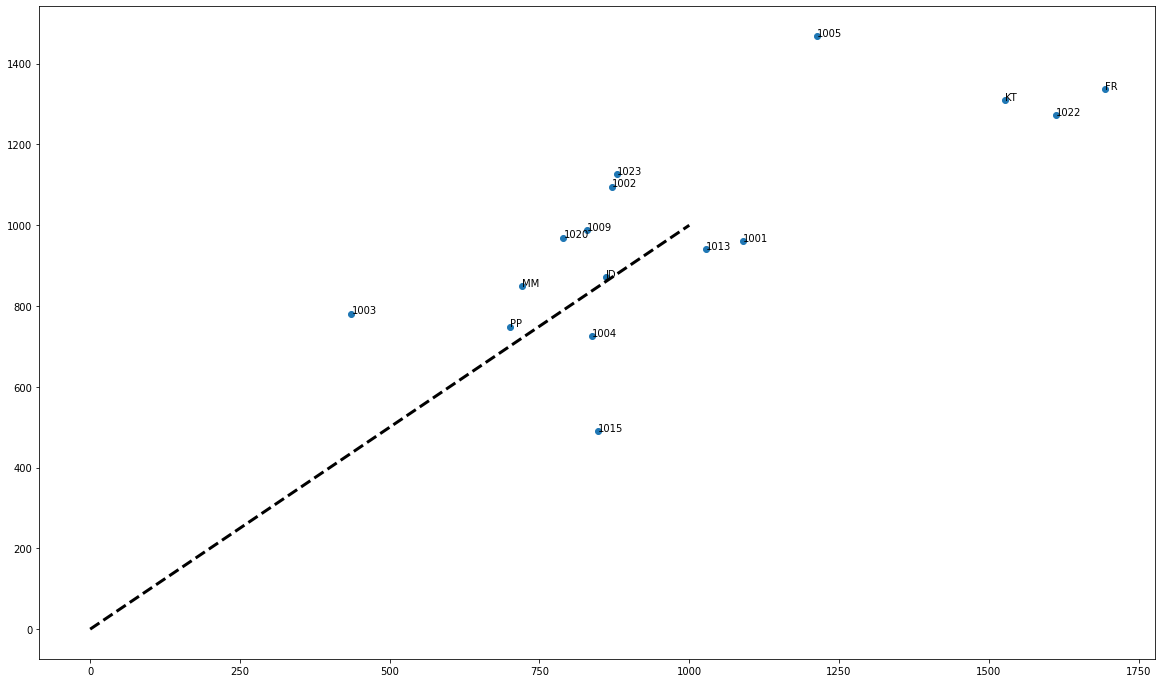

In [105]:
plt.figure()
plt.scatter(Y_s, results_s.predict(X_s))
for i, label in enumerate(subjs):
    plt.text(Y_s[i], results_s.predict(X_s)[i], label)
#     plt.lineplot()
#     plt.set_aspect('equal')
xpoints = ypoints = plt.xlim
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False,
         scaley=False,)
plt.xlabel ="True AUCs"
plt.ylabel ="Predicted AUCs"
plt.show()

Leave-One-Out model predicting ...
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [3]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15] TEST: [4]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15] TEST: [5]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15] TEST: [6]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15] TEST: [7]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15] TEST: [8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15] TEST: [9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15] TEST: [12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15] TEST: [13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15] TEST: [14]


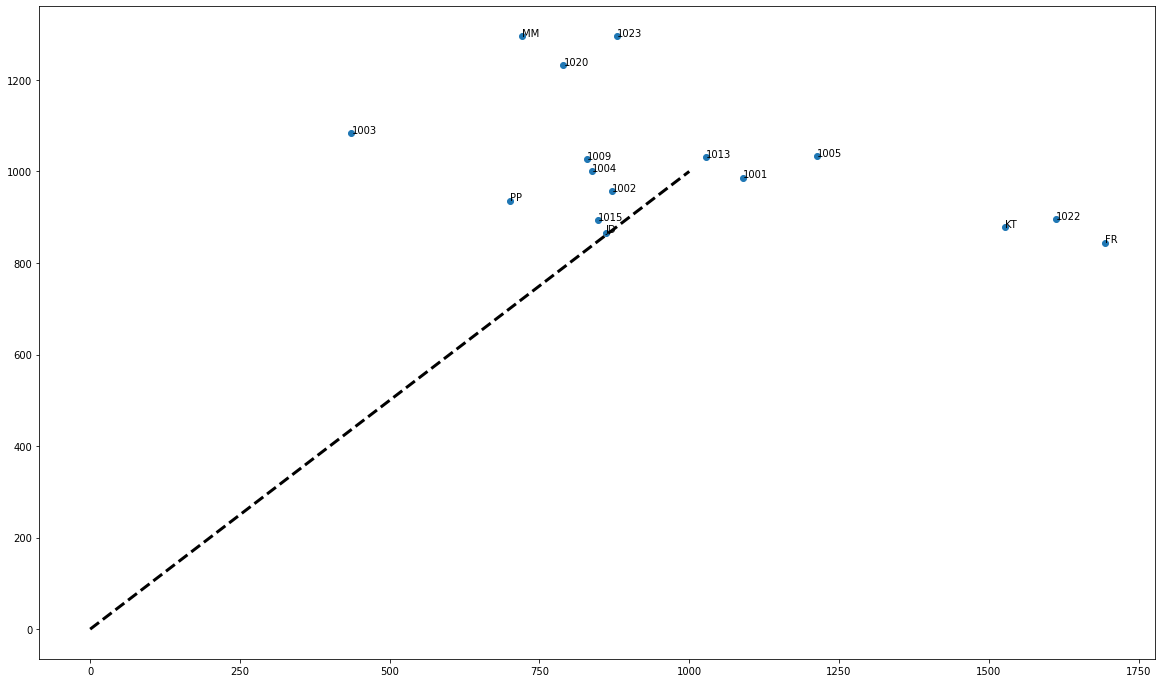

331.9870307935542
-0.5952929702416072


In [106]:
paralist = [
#         'NET dose (mCi)', 
        'Weight (Kgs)',
#         "weight_-1",
#         'Age',
#         "Sex",
#         "Genotype",
        'lambda',
#         'dose_by_age',
#         'weight_by_age',
#         "dose_2"
        "asg",
    ]
error1, ytrue1, ypred1 = lou_model(new_df, "auc", paralist, mode="linear")
print(np.mean(error1))
print(r2_score(ytrue1, ypred1))

Leave-One-Out model predicting ...
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [3]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15] TEST: [4]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15] TEST: [5]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15] TEST: [6]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15] TEST: [7]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15] TEST: [8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15] TEST: [9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15] TEST: [12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15] TEST: [13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15] TEST: [14]


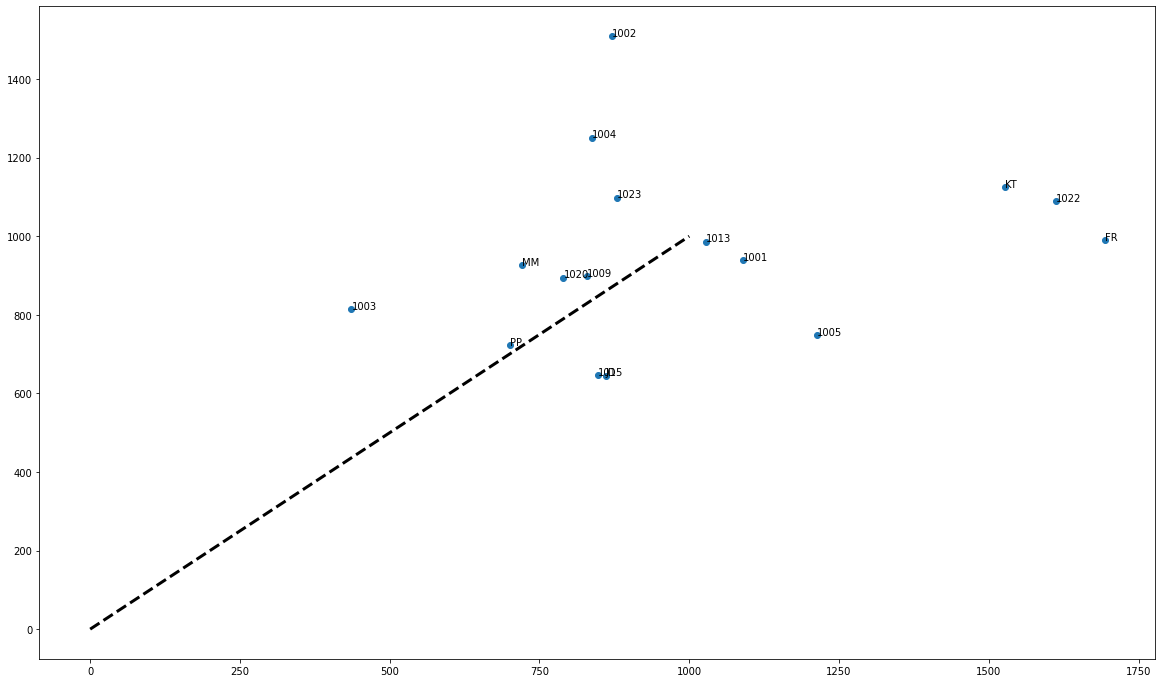

296.66458965887034
-0.12749413951668753


In [107]:
paralist = [
        'NET dose (mCi)', 
#         'Weight (Kgs)',
#         "weight_-1",
#         'Age',
#         "Sex",
#         "Genotype",
        'lambda',
#         'dose_by_age',
#         'weight_by_age',
#         "dose_2",
#         "asg",
    ]
error1, ytrue1, ypred1 = lou_model(new_df, "auc", paralist, mode="gbr")
print(np.mean(error1))
print(r2_score(ytrue1, ypred1))

In [164]:
scaled

,tts,1001,1002,1003,1004,1005,1009,1013,1015,1020,1022,1023,FR,JD,KT,MM,PP,pbif
0,0.0,0.000000,0.000000,0.000000e+00,0.016004,0.002474,0.000000,0.000000,0.000000,0.017722,0.000000,0.000000,0.000000,0.000000,0.000492,0.000000,7.940118e-07,0.002293
1,15.0,0.000000,0.000000,0.000000e+00,0.021339,0.013196,0.000000,0.000000,0.000000,0.026582,0.000000,0.000000,0.006200,0.000000,0.000655,0.000000,5.017812e-07,0.004248
2,30.0,0.000000,0.000000,2.064219e-02,0.026673,0.022268,0.022933,0.000000,0.000000,0.026582,0.000000,0.010227,0.012400,0.001162,0.012453,0.000000,1.425515e-03,0.009798
3,45.0,0.028453,0.039013,6.422015e-02,0.037585,0.028866,0.055522,0.017510,0.017710,0.026582,0.037221,0.050000,0.018601,0.024404,0.021629,0.008328,3.278684e-02,0.031777
4,60.0,0.054153,0.056225,9.403664e-02,0.040010,0.032165,0.059143,0.053502,0.053129,0.029114,0.050248,0.067045,0.024801,0.055782,0.030149,0.049965,4.846751e-02,0.049871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5340.0,0.000918,0.000025,9.224742e-11,0.000007,0.000825,0.000027,0.000973,0.001181,0.001266,0.000634,0.001136,0.000611,0.000039,0.001314,0.000047,4.751716e-05,0.000566
357,5355.0,0.000918,0.000019,6.918563e-11,0.000000,0.000825,0.000020,0.000973,0.001181,0.001266,0.000631,0.001136,0.000606,0.000029,0.001311,0.000035,3.563787e-05,0.000562
358,5370.0,0.000918,0.000013,4.612385e-11,0.000000,0.000825,0.000013,0.000973,0.001181,0.001266,0.000627,0.001136,0.000601,0.000020,0.000000,0.000024,2.375858e-05,0.000476
359,5385.0,0.000918,0.000006,2.306206e-11,0.000000,0.000825,0.000007,0.000973,0.001181,0.001266,0.000624,0.001136,0.000596,0.000010,0.000000,0.000012,1.187929e-05,0.000473


In [167]:
ypred2 = [882.9486920204464,
 995.9572768878247,
 723.5573964400979,
 980.7107810273477,
 1628.795041216879,
 1318.5540261532456,
 1052.5033873935813,
 750.9783115214801,
 928.2789699153792,
 1418.7159119406176,
 549.4685620759061,
 1063.2195266848385,
 758.9271554841697,
 1180.6612103433165,
 1382.1928526481786,
 1023.4358245913614]

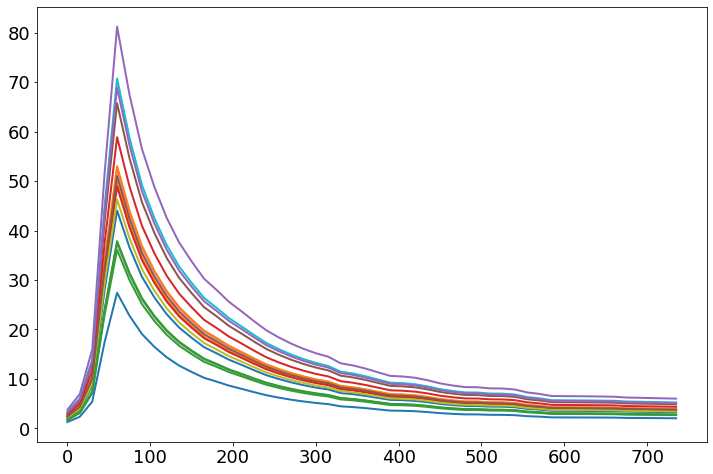

In [189]:
plt.rcParams["figure.figsize"] = (12,8)
plt.cmap="default"
for idx, name in enumerate(subjs):
    plt.plot(scaled.iloc[:50]['tts'], scaled.iloc[:50]['pbif']*ypred2[idx], linewidth=2, markersize=2)
# plt.legend(subjs)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.savefig("PredictedAIF1207.png", dpi=600)

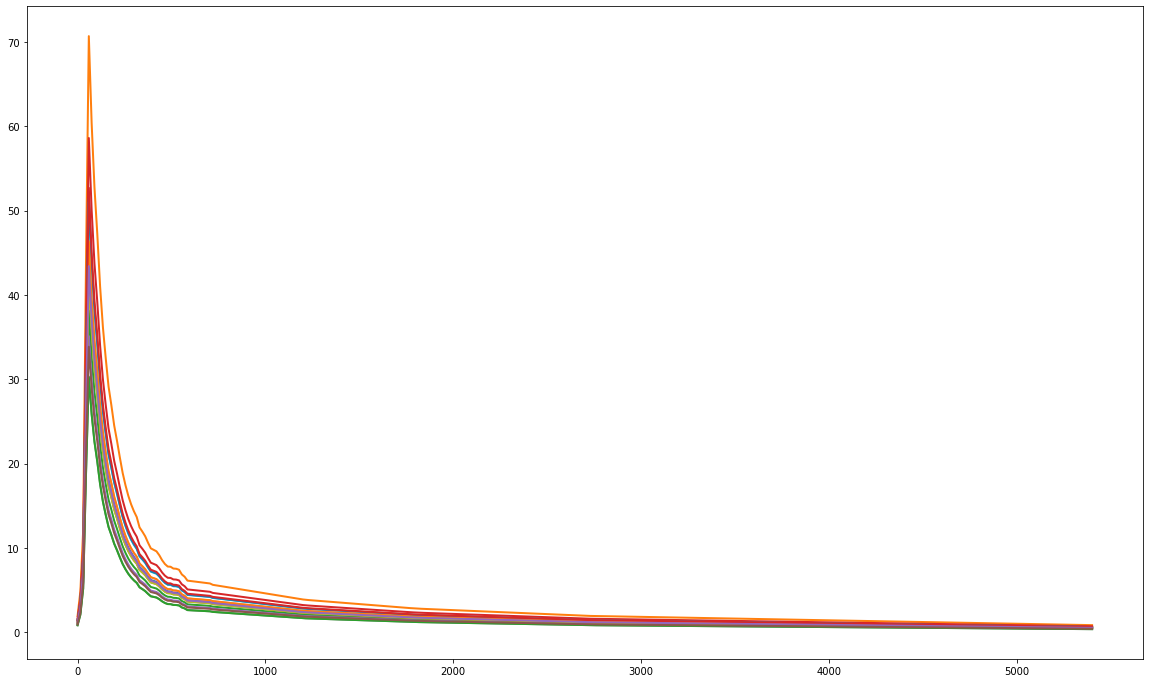

In [113]:
auc.loc["tts"] = 1
scaled = aif/auc
pbif = scaled.drop(columns=['tts']).mean(axis=1)
scaled.loc[:, "pbif"] = pbif
for ys in ypred1:
    plt.plot(scaled['tts'], scaled['pbif']*ys, linewidth=2, markersize=2)
plt.show()

In [109]:
ytrue1, ypred1

([array([1089.5]),
  array([871.5]),
  array([436.00025803]),
  array([838.]),
  array([1212.5]),
  array([828.5]),
  array([1028.]),
  array([847.]),
  array([790.]),
  array([1612.]),
  array([880.]),
  array([1693.5]),
  array([860.5]),
  array([1526.5]),
  array([720.5]),
  array([701.500909])],
 [array([939.2840322]),
  array([1509.25476449]),
  array([814.10705083]),
  array([1251.26453968]),
  array([749.15119915]),
  array([898.71793798]),
  array([986.3128959]),
  array([647.35542384]),
  array([894.42895486]),
  array([1089.45876448]),
  array([1098.52509617]),
  array([990.54163275]),
  array([645.41721902]),
  array([1125.17312123]),
  array([926.88520343]),
  array([722.6453427])])

## Last Step: Save for Sneha

In [533]:
pred = results_s.predict(X_s).values

In [534]:
pred

array([1072.74329   , 1179.5265235 ,  822.30821017,  734.49211622,
       1281.75211705,  967.60444994, 1047.48057793,  509.8612884 ,
       1132.71034174, 1130.18520832,  776.04658379, 1439.31142198,
        932.10735984, 1373.50001122,  769.9396812 ,  765.93198572])

In [580]:
dfs = scaled.copy()

In [581]:
for i, name in enumerate(subjs):
    print(i, name)
    dfs.loc[:, name] = scaled.loc[:, "pbif"] * pred[i]

0 1001
1 1002
2 1003
3 1004
4 1005
5 1009
6 1013
7 1015
8 1020
9 1022
10 1023
11 FR
12 JD
13 KT
14 MM
15 PP


In [582]:
dfs

,tts,1001,1002,1003,1004,1005,1009,1013,1015,1020,1022,1023,FR,JD,KT,MM,PP,pbif
0,0.0,1.354106,1.488897,1.037986,0.927137,1.617935,1.221391,1.322218,0.643590,1.429802,1.426614,0.979591,1.816819,1.176584,1.733747,0.971882,0.966823,0.001262
1,15.0,3.445732,3.788728,2.641316,2.359244,4.117084,3.108018,3.364586,1.637713,3.638351,3.630240,2.492720,4.623177,2.993999,4.411785,2.473104,2.460231,0.003212
2,30.0,8.613426,9.470825,6.602596,5.897490,10.291630,7.769230,8.410583,4.093852,9.094922,9.074647,6.231146,11.556728,7.484211,11.028305,6.182111,6.149932,0.008029
3,45.0,31.207418,34.313874,23.921955,21.367277,37.287742,28.148801,30.472495,14.832490,32.951934,32.878474,22.576147,41.871335,27.116147,39.956801,22.398490,22.281901,0.029091
4,60.0,50.246858,55.248541,38.516581,34.403311,60.036746,45.322198,49.063563,23.881695,53.055690,52.937414,36.349705,67.416760,43.659528,64.334180,36.063661,35.875942,0.046840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5340.0,0.608838,0.669443,0.466703,0.416863,0.727461,0.549166,0.594500,0.289373,0.642872,0.641439,0.440447,0.816885,0.529020,0.779533,0.436981,0.434706,0.000568
357,5355.0,0.604453,0.664621,0.463341,0.413860,0.722222,0.545211,0.590218,0.287289,0.638242,0.636819,0.437275,0.811001,0.525209,0.773918,0.433834,0.431575,0.000563
358,5370.0,0.600067,0.659799,0.459980,0.410858,0.716982,0.541255,0.585936,0.285204,0.633611,0.632199,0.434102,0.805117,0.521399,0.768304,0.430686,0.428444,0.000559
359,5385.0,0.595682,0.654977,0.456618,0.407855,0.711742,0.537300,0.581654,0.283120,0.628981,0.627579,0.430930,0.799233,0.517588,0.762689,0.427539,0.425313,0.000555


In [549]:
PATH_MS = "/Users/darenma/Downloads/PBIFs_replace_and_compare/PBIF_sqrtDose_weight_scale_ML_MS/"
df_DPA050819 = pd.read_csv(PATH_MS+"popbased_MetCorrWB_sqrt_dose_weight_ML_DPA050819.crv",sep="\t")
df_DPA052219 = pd.read_csv(PATH_MS+"popbased_MetCorrWB_sqrt_dose_weight_ML_DPA052219.crv",sep="\t", index_col=0)
df_DPA092617 = pd.read_csv(PATH_MS+"popbased_MetCorrWB_sqrt_dose_weight_ML_DPA092617.crv",sep="\t", index_col=0)
df_DPA110117 = pd.read_csv(PATH_MS+"popbased_MetCorrWB_sqrt_dose_weight_ML_DPA110117.crv",sep="\t", index_col=0)
df_DPA121918 = pd.read_csv(PATH_MS+"popbased_MetCorrWB_sqrt_dose_weight_ML_DPA121918.crv",sep="\t", index_col=0)

In [550]:
df_DPA050819

,value[kBq/cc]
0,0.426486
1,0.498288
2,0.570090
3,0.641892
4,0.713695
...,...
5396,0.029880
5397,0.029868
5398,0.029855
5399,0.029843


In [ ]:
PATH_MS = "/Users/darenma/Downloads/PBIFs_replace_and_compare/PBIF_sqrtDose_weight_scale_ML_MS/"
df_DPA050819 = pd.read_csv(PATH_MS+"popbased_MetCorrWB_sqrt_dose_weight_ML_DPA050819.crv",sep="\t")
df_DPA052219 = pd.read_csv(PATH_MS+"popbased_MetCorrWB_sqrt_dose_weight_ML_DPA052219.crv",sep="\t", index_col=0)
df_DPA092617 = pd.read_csv(PATH_MS+"popbased_MetCorrWB_sqrt_dose_weight_ML_DPA092617.crv",sep="\t", index_col=0)
df_DPA110117 = pd.read_csv(PATH_MS+"popbased_MetCorrWB_sqrt_dose_weight_ML_DPA110117.crv",sep="\t", index_col=0)
df_DPA121918 = pd.read_csv(PATH_MS+"popbased_MetCorrWB_sqrt_dose_weight_ML_DPA121918.crv",sep="\t", index_col=0)

In [ ]:
df_DPA050819.loc[:,'value[kBq/cc]'] = mainf["May_8_2019(PP)"]
df_DPA052219.loc[:,'value[kBq/cc]'] = mainf["May_22_2019(MM)"]
df_DPA092617.loc[:,'value[kBq/cc]'] = mainf["Sept_26_2017(FR)"]
df_DPA110117.loc[:,'value[kBq/cc]'] = mainf["Nov_1_2017(KT)"]
df_DPA121918.loc[:,'value[kBq/cc]'] = mainf["Dec_19_2019(JD)"]

In [ ]:
df_DPA050819.to_csv(PATH_MS+"popbased_MetCorrWB_sqrt_dose_weight_ML_DPA050819.crv",sep="\t", index=False)
df_DPA052219.to_csv(PATH_MS+"popbased_MetCorrWB_sqrt_dose_weight_ML_DPA052219.crv",sep="\t", index=False)
df_DPA092617.to_csv(PATH_MS+"popbased_MetCorrWB_sqrt_dose_weight_ML_DPA092617.crv",sep="\t", index=False)
df_DPA110117.to_csv(PATH_MS+"popbased_MetCorrWB_sqrt_dose_weight_ML_DPA110117.crv",sep="\t", index=False)
df_DPA121918.to_csv(PATH_MS+"popbased_MetCorrWB_sqrt_dose_weight_ML_DPA121918.crv",sep="\t", index=False)

In [529]:
PATH_PD = '/Users/darenma/Downloads/PBIFs_replace_and_compare/PBIF_New_15s_PD_Actual_AUC/'

In [530]:
zl = ['1001',
 '1002',
 '1003',
 '1004',
 '1005',
 '1009',
 '10013',
 '10015',
 '10020',
 '10022',
 '10023']

In [583]:
for x in zl:
    if len(x)>4:
        xname = str(int(x[0]+x[2:]))
    else:
        xname = str(int(x))
    pathn = PATH_PD + x + ".crv"
    dfn = dfs[["tts", xname]]
    
    dfn = dfn.set_index("tts")
#     dfn = pd.read_csv(pathn, sep="\t")
#     dfn.loc[:,'value[kBq/cc]'] = mainf[xname]
#     dfn.to_csv(pathn, sep="\t", index=False)

In [579]:
dfs

,tts,1001,1002,1003,1004,1005,1009,1013,1015,1020,1022,1023,FR,JD,KT,MM,PP,pbif
0,0.0,0.000000,0.000000,0.000000e+00,0.000000,3.171345,0.000000,0.000000,0.000000,20.073348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000608,0.001262
1,15.0,0.000000,0.000000,0.000000e+00,3.856522,16.913842,0.000000,0.000000,0.000000,30.110022,0.000000,0.000000,8.923986,0.000000,0.224943,0.000000,0.000384,0.003212
2,30.0,0.000000,0.000000,1.697424e+01,7.713044,28.542109,22.190084,0.000000,0.000000,30.110022,0.000000,7.936840,17.847972,1.083216,0.449885,0.000000,1.091847,0.008029
3,45.0,30.523214,46.017099,5.280875e+01,11.569566,36.999030,53.723361,18.341100,9.029421,30.110022,42.066447,38.802329,26.771957,22.747536,0.674828,6.411711,25.112492,0.029091
4,60.0,58.092569,66.318760,7.732710e+01,15.426087,41.227491,57.227059,56.042249,27.088262,32.977643,56.789703,52.030396,35.695943,51.994368,0.899771,38.470269,37.122814,0.046840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5340.0,0.984620,0.030077,7.585581e-08,0.019696,1.057115,0.025953,1.018950,0.601961,1.433811,0.716775,0.881871,0.879210,0.036411,1.819648,0.036224,0.036395,0.000568
357,5355.0,0.984620,0.022557,5.689191e-08,0.014772,1.057115,0.019465,1.018950,0.601961,1.433811,0.712858,0.881871,0.871884,0.027308,1.814621,0.027168,0.027296,0.000563
358,5370.0,0.984620,0.015038,3.792802e-08,0.009848,1.057115,0.012977,1.018950,0.601961,1.433811,0.708941,0.881871,0.864557,0.018205,1.809595,0.018112,0.018197,0.000559
359,5385.0,0.984620,0.007519,1.896412e-08,0.004924,1.057115,0.006488,1.018950,0.601961,1.433811,0.705024,0.881871,0.857230,0.009103,1.804568,0.009056,0.009099,0.000555


In [609]:
dfs

,tts,1001,1002,1003,1004,1005,1009,1013,1015,1020,1022,1023,FR,JD,KT,MM,PP,pbif
0,0.0,1.354106,1.488897,1.037986,0.927137,1.617935,1.221391,1.322218,0.643590,1.429802,1.426614,0.979591,1.816819,1.176584,1.733747,0.971882,0.966823,0.001262
1,15.0,3.445732,3.788728,2.641316,2.359244,4.117084,3.108018,3.364586,1.637713,3.638351,3.630240,2.492720,4.623177,2.993999,4.411785,2.473104,2.460231,0.003212
2,30.0,8.613426,9.470825,6.602596,5.897490,10.291630,7.769230,8.410583,4.093852,9.094922,9.074647,6.231146,11.556728,7.484211,11.028305,6.182111,6.149932,0.008029
3,45.0,31.207418,34.313874,23.921955,21.367277,37.287742,28.148801,30.472495,14.832490,32.951934,32.878474,22.576147,41.871335,27.116147,39.956801,22.398490,22.281901,0.029091
4,60.0,50.246858,55.248541,38.516581,34.403311,60.036746,45.322198,49.063563,23.881695,53.055690,52.937414,36.349705,67.416760,43.659528,64.334180,36.063661,35.875942,0.046840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5340.0,0.608838,0.669443,0.466703,0.416863,0.727461,0.549166,0.594500,0.289373,0.642872,0.641439,0.440447,0.816885,0.529020,0.779533,0.436981,0.434706,0.000568
357,5355.0,0.604453,0.664621,0.463341,0.413860,0.722222,0.545211,0.590218,0.287289,0.638242,0.636819,0.437275,0.811001,0.525209,0.773918,0.433834,0.431575,0.000563
358,5370.0,0.600067,0.659799,0.459980,0.410858,0.716982,0.541255,0.585936,0.285204,0.633611,0.632199,0.434102,0.805117,0.521399,0.768304,0.430686,0.428444,0.000559
359,5385.0,0.595682,0.654977,0.456618,0.407855,0.711742,0.537300,0.581654,0.283120,0.628981,0.627579,0.430930,0.799233,0.517588,0.762689,0.427539,0.425313,0.000555


In [616]:
PATH_ = '/Users/darenma/Downloads/PBIFs_replace_and_compare/PBIF_New_15s_PD_Actual_AUC/'

# To decide predicted AUC or actual AUC
for i, name in enumerate(subjs):
    print(i, name)
    dfs.loc[:, name] = scaled.loc[:, "pbif"] * auc[i+1]

for xname in subjs:
    pathn = PATH_ + xname + ".crv"
    dfn = dfs[["tts", xname]]
    dfn = dfn.set_index("tts")
    dfn.columns = ["value[kBq/cc]"]
    dfn.to_csv(pathn, sep="\t", index=True)

0 1001
1 1002
2 1003
3 1004
4 1005
5 1009
6 1013
7 1015
8 1020
9 1022
10 1023
11 FR
12 JD
13 KT
14 MM
15 PP


In [115]:
pathn

NameError: name 'pathn' is not defined

In [592]:
pd.read_csv('/Users/darenma/Downloads/PBIFs_replace_and_compare/PBIF_New_15s_PD/PP.crv', sep="\t")

,tts,value[kBq/cc]
0,0.0,0.966823
1,15.0,2.460231
2,30.0,6.149932
3,45.0,22.281901
4,60.0,35.875942
...,...,...
356,5340.0,0.434706
357,5355.0,0.431575
358,5370.0,0.428444
359,5385.0,0.425313
